In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv('./spam.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4',	'Unnamed: 5',	'Unnamed: 6',	'Unnamed: 7'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
2365,ham,Ok try to do week end course in coimbatore.
5451,ham,Just sing HU. I think its also important to fi...
1031,ham,Yup bathe liao...
1114,ham,No no:)this is kallis home ground.amla home to...
4594,ham,Yo sorry was in the shower sup


In [7]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [8]:
df.shape

(5572, 2)

In [9]:
df.isna().sum()

target    0
text      0
dtype: int64

# Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['target'] = le.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

409

In [17]:
df.drop_duplicates(keep='first', inplace=True)

In [18]:
df.shape

(5163, 2)

# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

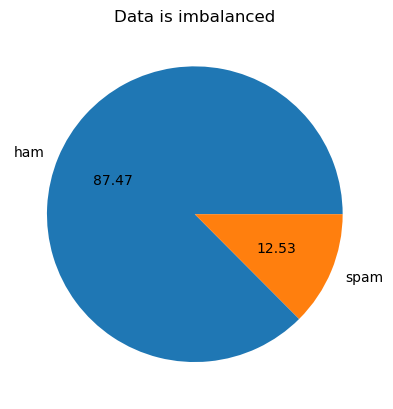

In [24]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f');
plt.title("Data is imbalanced")
plt.show()

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [29]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# num of sentence
df['num_sen'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head(6)

,target,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [33]:
df[['num_characters', 'num_words', 'num_sen']].describe()

,num_characters,num_words,num_sen
count,5163.000000,5163.000000,5163.000000
mean,78.807670,18.444122,1.963974
std,58.145178,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sen']].describe()

,num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.425155,17.123782,1.820195
std,56.345988,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sen']].describe()

,num_characters,num_words,num_sen
count,647.000000,647.000000,647.000000
mean,137.316847,27.659969,2.967543
std,30.099269,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

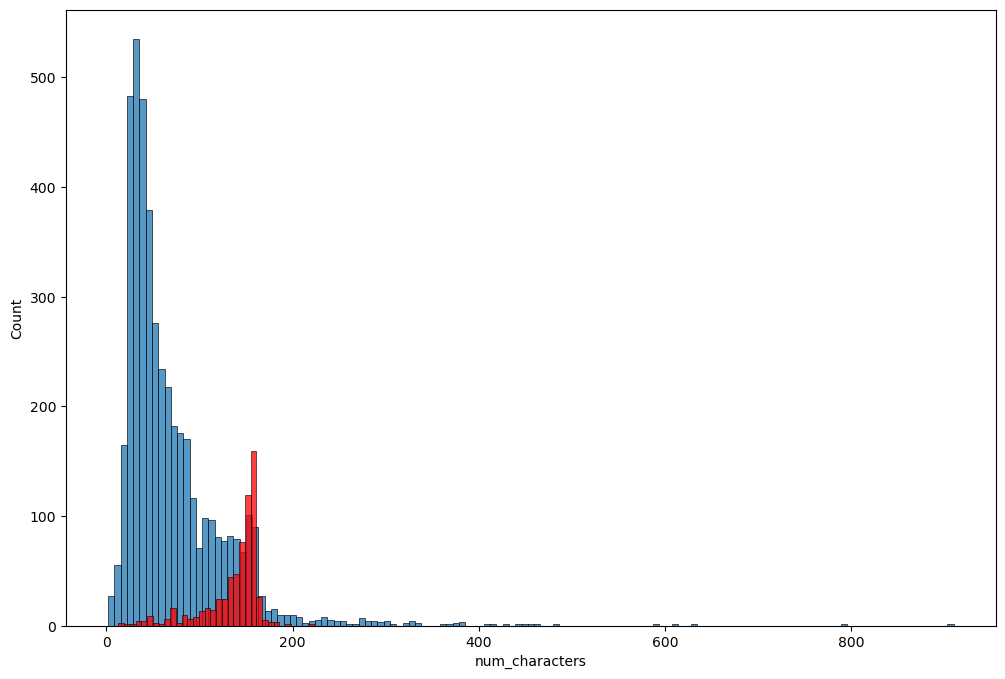

In [36]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

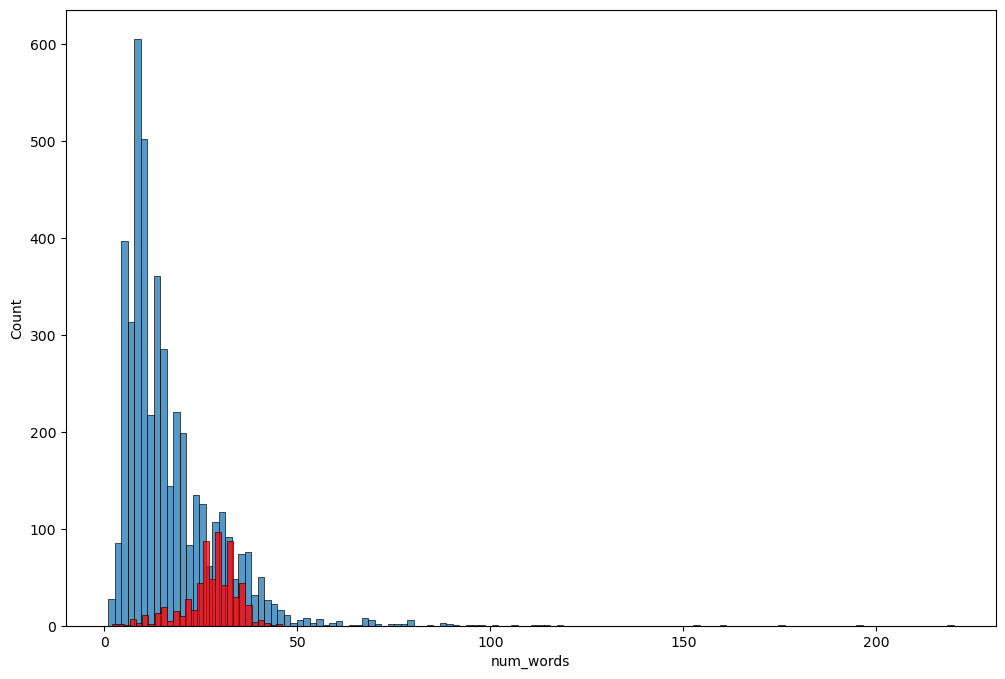

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

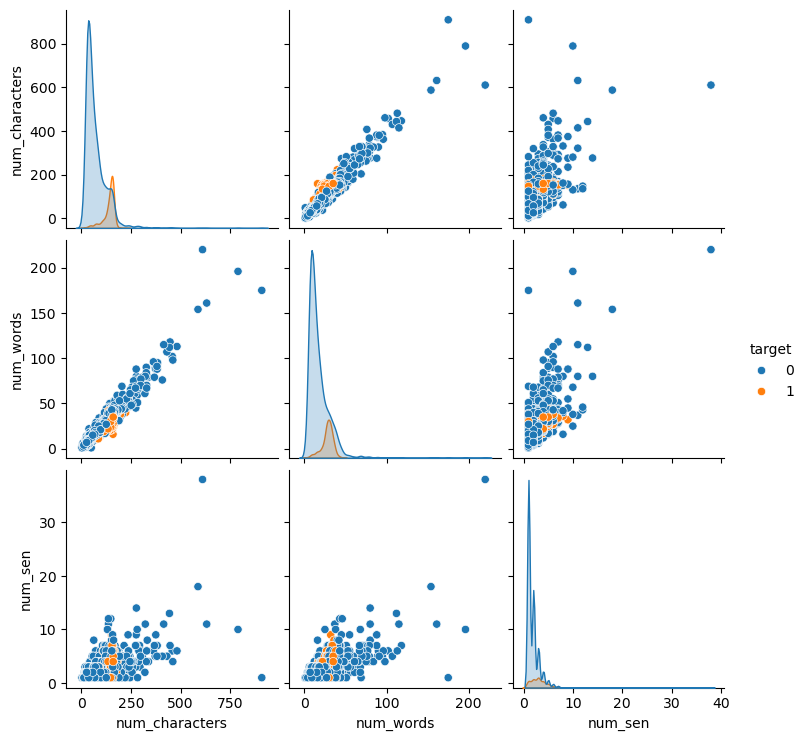

In [38]:
sns.pairplot(df, hue='target')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5163 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5163 non-null   int32 
 1   text            5163 non-null   object
 2   num_characters  5163 non-null   int64 
 3   num_words       5163 non-null   int64 
 4   num_sen         5163 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 221.8+ KB


<Axes: >

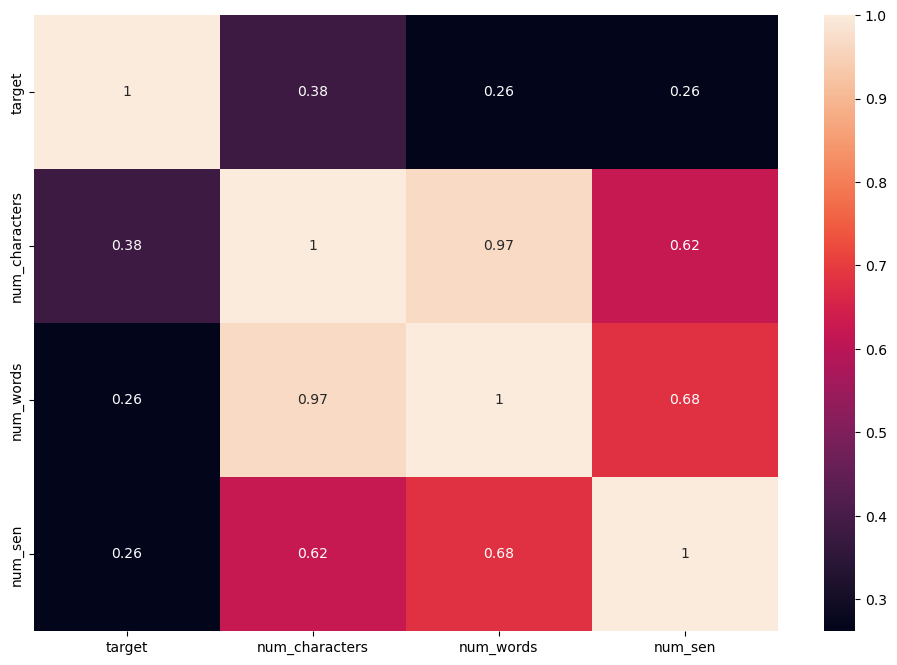

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)

# 3. Data Preprocessing
   - Lower case
   - Tokenization
   - Removing special characters
   - Removing stop words and punctuation
   - Stemming

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords

In [44]:
import string

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [46]:
from nltk.stem.porter import PorterStemmer

In [47]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [48]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
df['transformed_text'] = df['text'].apply(transform_text)

In [50]:
df.head(8)

,target,text,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...


In [51]:
from wordcloud import WordCloud

In [52]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

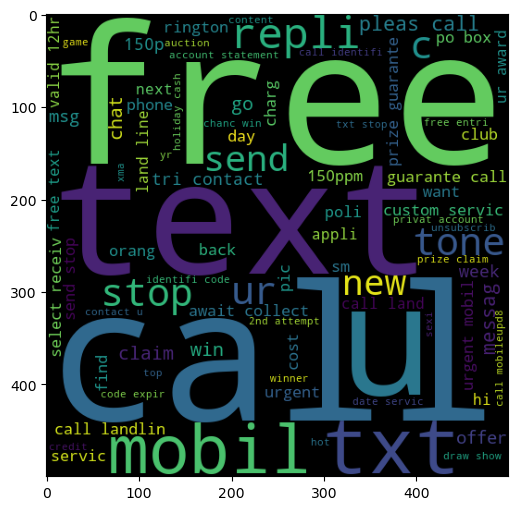

In [54]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

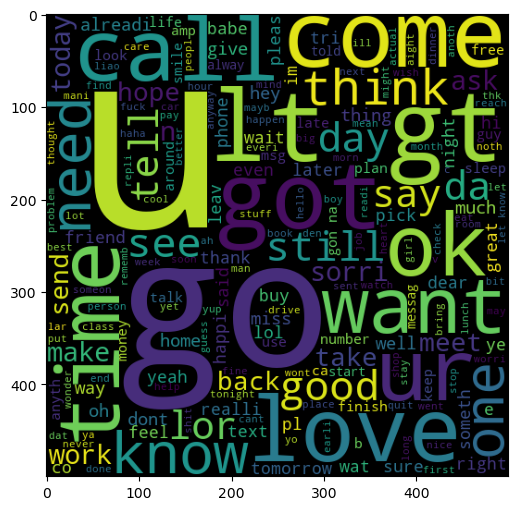

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

9861

In [59]:
from collections import Counter

In [60]:
top30 = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [61]:
top30.columns

RangeIndex(start=0, stop=2, step=1)

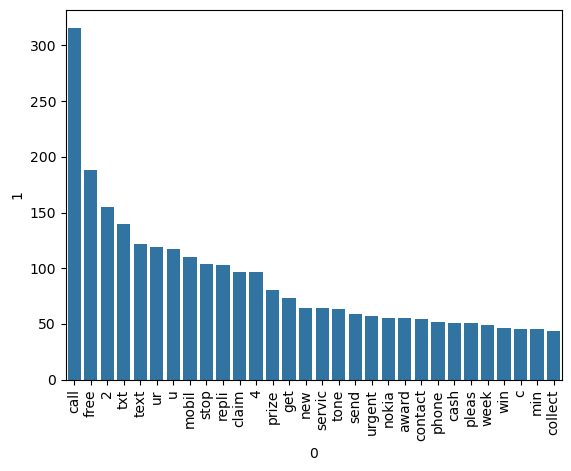

In [62]:
sns.barplot(x=top30[0], y=top30[1], data=top30)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
top30_ = pd.DataFrame(Counter(spam_corpus).most_common(30))

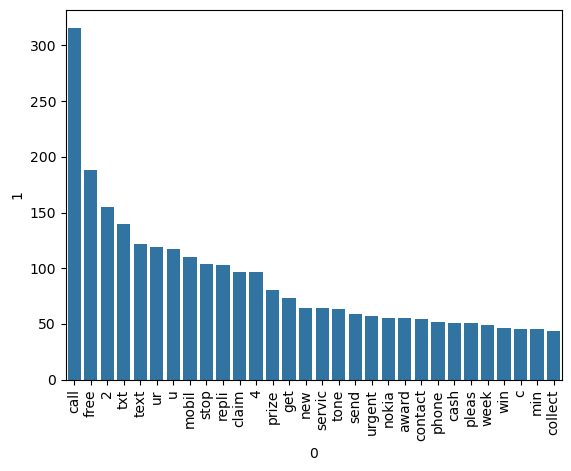

In [65]:
sns.barplot(x=top30_[0], y=top30_[1], data=top30_)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df.head()

,target,text,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [69]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
X.shape

(5163, 3000)

In [72]:
y = df['target'].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_pred1, y_test))
print(confusion_matrix(y_pred1, y_test))
print(precision_score(y_pred1, y_test))

0.861568247821878
[[784  15]
 [128 106]]
0.8760330578512396


In [78]:
mnb.fit(x_train, y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_pred1, y_test))
print(confusion_matrix(y_pred1, y_test))
print(precision_score(y_pred1, y_test))

0.9719264278799613
[[911  28]
 [  1  93]]
0.768595041322314


In [79]:
bnb.fit(x_train, y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_pred1, y_test))
print(confusion_matrix(y_pred1, y_test))
print(precision_score(y_pred1, y_test))

0.978702807357212
[[909  19]
 [  3 102]]
0.8429752066115702


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [83]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [84]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9777347531461762, 0.9711538461538461)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777347531461762
Precision -  0.9711538461538461
For  KN
Accuracy -  0.9235237173281704
Precision -  1.0
For  NB
Accuracy -  0.9719264278799613
Precision -  0.9893617021276596
For  DT
Accuracy -  0.936108422071636
Precision -  0.8235294117647058
For  LR
Accuracy -  0.9554695062923524
Precision -  0.9310344827586207
For  RF
Accuracy -  0.9748305905130688
Precision -  0.9896907216494846


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9641819941916747
Precision -  0.9468085106382979
For  BgC
Accuracy -  0.9622458857696031
Precision -  0.853448275862069
For  ETC
Accuracy -  0.9806389157792836
Precision -  0.9809523809523809
For  GBDT
Accuracy -  0.9535333978702807
Precision -  0.9397590361445783
For  xgb
Accuracy -  0.9622458857696031
Precision -  0.8942307692307693


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.923524,1.000000
5,RF,0.974831,0.989691
2,NB,0.971926,0.989362
8,ETC,0.980639,0.980952
0,SVC,0.977735,0.971154
6,AdaBoost,0.964182,0.946809
9,GBDT,0.953533,0.939759
4,LR,0.955470,0.931034
10,xgb,0.962246,0.894231
7,BgC,0.962246,0.853448


In [88]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [89]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.923524
1,RF,Accuracy,0.974831
2,NB,Accuracy,0.971926
3,ETC,Accuracy,0.980639
4,SVC,Accuracy,0.977735
5,AdaBoost,Accuracy,0.964182
6,GBDT,Accuracy,0.953533
7,LR,Accuracy,0.955470
8,xgb,Accuracy,0.962246
9,BgC,Accuracy,0.962246


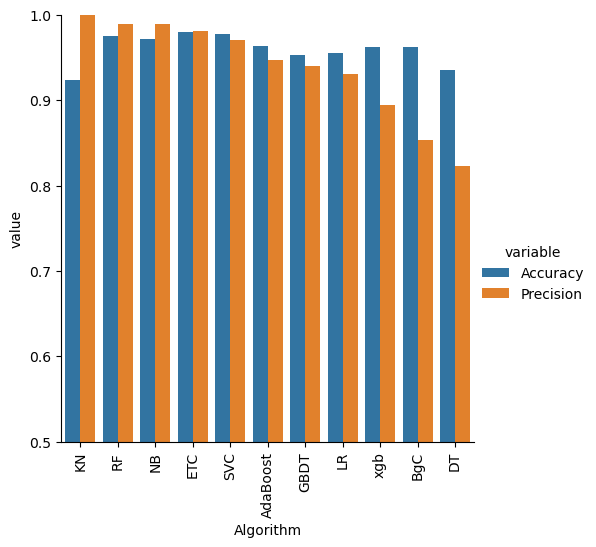

In [90]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [93]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [94]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [96]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.923524,1.000000,0.923524,1.000000,0.923524,1.000000,0.923524,1.000000
1,RF,0.974831,0.989691,0.974831,0.989691,0.974831,0.989691,0.974831,0.989691
2,NB,0.971926,0.989362,0.971926,0.989362,0.971926,0.989362,0.971926,0.989362
3,ETC,0.980639,0.980952,0.980639,0.980952,0.980639,0.980952,0.980639,0.980952
4,SVC,0.977735,0.971154,0.977735,0.971154,0.977735,0.971154,0.977735,0.971154
5,AdaBoost,0.964182,0.946809,0.964182,0.946809,0.964182,0.946809,0.964182,0.946809
6,GBDT,0.953533,0.939759,0.953533,0.939759,0.953533,0.939759,0.953533,0.939759
7,LR,0.955470,0.931034,0.955470,0.931034,0.955470,0.931034,0.955470,0.931034
8,xgb,0.962246,0.894231,0.962246,0.894231,0.962246,0.894231,0.962246,0.894231
9,BgC,0.962246,0.853448,0.962246,0.853448,0.962246,0.853448,0.962246,0.853448


In [97]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [98]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [99]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [100]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816069699903195
Precision 0.9811320754716981


In [101]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [102]:
from sklearn.ensemble import StackingClassifier

In [103]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [104]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845111326234269
Precision 0.972972972972973


In [105]:
import pickle

In [106]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [107]:
pickle.dump(etc, open('model.pkl', 'wb'))

In [108]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(x_train, y_train)
etc.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])